In [3]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
q_toys = stats.chi2(1).rvs((10000, 50))
qmax_toys = np.max(q_toys, axis=1)

In [16]:
def nup(sample, c):
    return np.count_nonzero(np.diff((sample > c) + 0.) == 1.)

def nup_mean(samples, c):
    return np.mean([nup(s, c) for s in samples])   

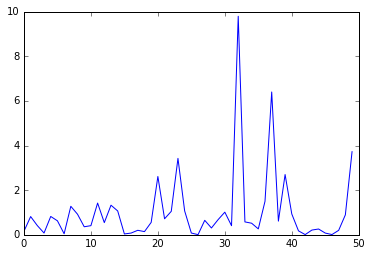

In [17]:
plt.plot(q_toys[0])

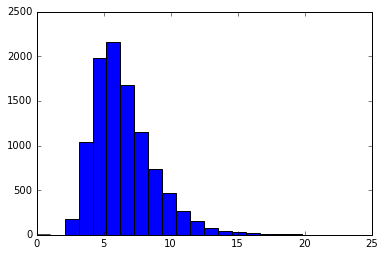

In [19]:
plt.hist(qmax_toys, bins=np.linspace(0, 25, 25))
plt.show()

In [20]:
def cumfreq(x, sample):
    return np.count_nonzero(sample > x) / float(len(sample))

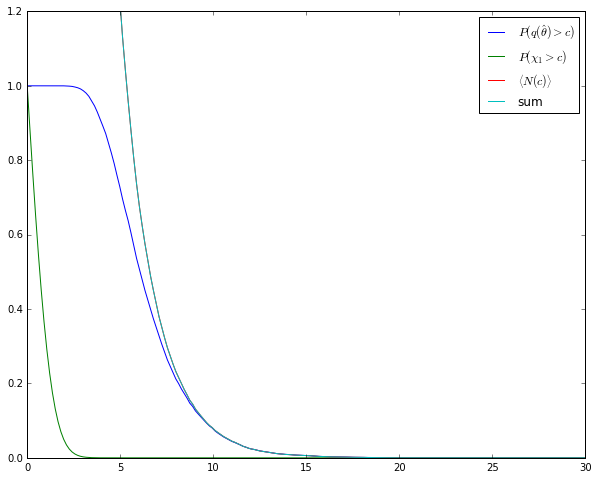

In [23]:
c = np.linspace(0, 30, 200)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(c, [cumfreq(cc, qmax_toys) for cc in c], label=r'$P(q(\hat\theta)>c)$')
chi2sf = stats.chi(1).sf(c)
ax.plot(c, chi2sf, label=r'$P(\chi_1>c)$')
nupmean_toys = [nup_mean(q_toys, cc) for cc in c]
ax.plot(c, nupmean_toys, label=r'$\left<N(c)\right>$')
ax.plot(c, chi2sf + nupmean_toys, label='sum')
ax.set_ylim(1E-4, 1.2)
#ax.set_yscale('log')
ax.legend()